# Model Building for Iris Dataset Classification

## Import important libraries 
We will add more libraries later as required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn import datasets

%matplotlib inline

## Read Data

In [2]:
data = datasets.load_iris()
X = pd.DataFrame(data=data['data'], 
                  columns = data['feature_names'][:4])
y = pd.Series(data['target'], name='Species').apply(lambda x: data['target_names'][x])

## Data Profiling

In [3]:
# Check data
print('Predictor Variables')
print(X.head())

print('Response Variable')
print(y.head())

Predictor Variables
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Response Variable
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object


In [4]:
# Short Information about data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# Numerical summary of each attribute
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Distribution of Species
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

## Data Visualization

<AxesSubplot:>

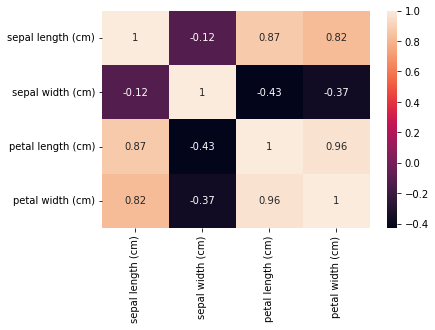

In [7]:
# Correlation plot
sns.heatmap(X.corr(), annot=True)

Note: Petal length and width are positively correlated whereas there is almost no correlation between sepal length and width. The correlation plot also indicates high correlation of sepal length with petal length and petal width.

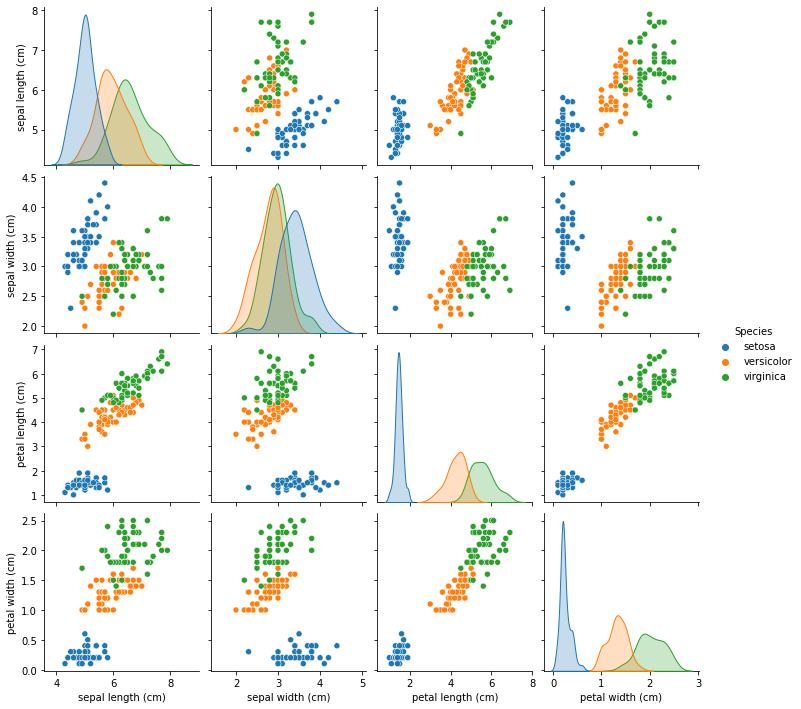

In [8]:
# Pair plot
sns.pairplot(pd.concat([X, y], axis=1), hue='Species')

Note: Similar observation as before altough there are some differences based on species.

<AxesSubplot:>

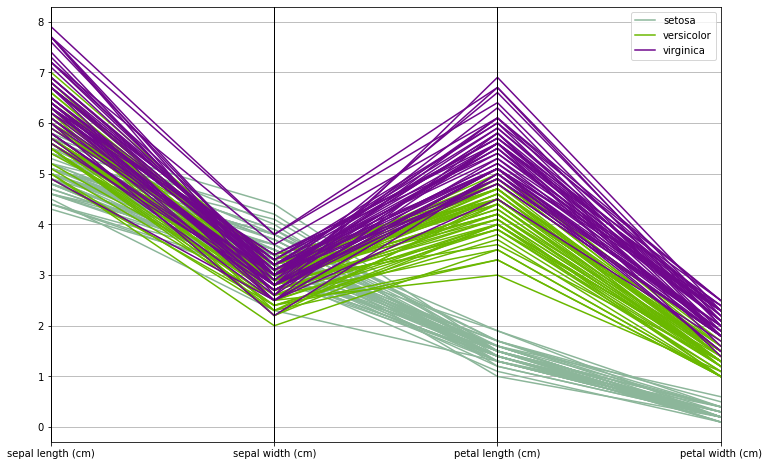

In [9]:
# Parallel Co-ordinate plot
plt.figure(figsize=(12, 8))
parallel_coordinates(pd.concat([X, y], axis=1), class_column='Species')

Note: Petal measurements shows a better demarcation to differentiate species than sepal measurement. 

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

## Model Building

Note: We will build three separate models. First we will start with a simple K nearest neighbor then we will use Random Forest Classification and at the end we will try Artificial Neural Network.

As the purpose of this work is mainly to build a demo web app using streamlit library. No cross validation and Parameter tuning is performed.

### K Nearest Neighbor

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])))
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

The accuracy using KNN is 0.9333333333333333
Confusion Matrix


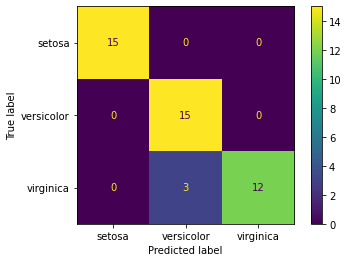

In [13]:
# Model Performance
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
print('The accuracy using KNN is', accuracy_score(y_test, y_pred_knn))

print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

KNN is performing well with 0.933 accuracy.

### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25, bootstrap=False)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

The accuracy using Random Forest Classifier is 0.9333333333333333
Confusion Matrix


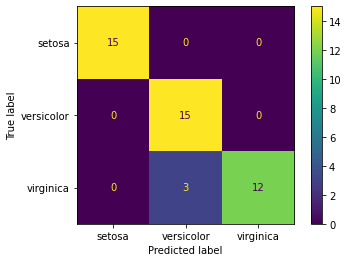

In [15]:
# Model Performance
print('The accuracy using Random Forest Classifier is', accuracy_score(y_test, y_pred_rf))

print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

The result is almost similar to KNN.

### Artifical Neural Network

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
ann = keras.models.Sequential([
    layers.Dense(15, input_dim=4, activation='relu'),
    layers.Dense(12, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(3, activation='softmax')]
)

2022-01-24 18:39:06.215725: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Compile the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                75        
                                                                 
 dense_1 (Dense)             (None, 12)                192       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 366
Trainable params: 366
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Label Encoder for response variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_label = le.fit_transform(y_train.values)
y_test_label = le.transform(y_test.values)
# Fit the data
ann.fit(X_train, y_train_label, epochs=100, validation_data=(X_test, y_test_label), verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 54ms/step - loss: 1.0993 - accuracy: 0.3714 - val_loss: 1.0850 - val_accuracy: 0.5556
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0861 - accuracy: 0.5143 - val_loss: 1.0757 - val_accuracy: 0.5778
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0757 - accuracy: 0.5714 - val_loss: 1.0660 - val_accuracy: 0.7778
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0651 - accuracy: 0.7619 - val_loss: 1.0566 - val_accuracy: 0.8000
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0555 - accuracy: 0.7619 - val_loss: 1.0470 - val_accuracy: 0.8222
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0454 - accuracy: 0.7619 - val_loss: 1.0373 - val_accuracy: 0.8222
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0356 - accuracy: 0.7524 - val_loss: 1.0276 - val_accuracy: 0.8222
Epoch 8/100
4/4 [======

4/4 [==============================] - 0s 8ms/step - loss: 0.2157 - accuracy: 0.9524 - val_loss: 0.2532 - val_accuracy: 0.9333
Epoch 60/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2079 - accuracy: 0.9524 - val_loss: 0.2446 - val_accuracy: 0.9333
Epoch 61/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2012 - accuracy: 0.9524 - val_loss: 0.2355 - val_accuracy: 0.9333
Epoch 62/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1954 - accuracy: 0.9524 - val_loss: 0.2298 - val_accuracy: 0.9333
Epoch 63/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1905 - accuracy: 0.9619 - val_loss: 0.2276 - val_accuracy: 0.9333
Epoch 64/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1845 - accuracy: 0.9619 - val_loss: 0.2199 - val_accuracy: 0.9333
Epoch 65/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1784 - accuracy: 0.9619 - val_loss: 0.2195 - val_accuracy: 0.9333
Epoch 66/100
4/4 [===============

In [19]:
y_pred_ann = np.argmax(ann.predict(X_test), axis=1)

In [20]:
y_pred_ann = le.inverse_transform(y_pred_ann)

The accuracy using ANN is 0.9333333333333333
Confusion Matrix


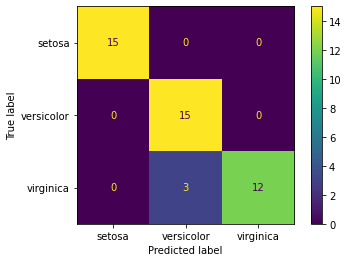

In [21]:
# Model Performance
print('The accuracy using ANN is', accuracy_score(y_test, y_pred_ann))

print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann)

All models are working equally fine. 

## Save the models

In [22]:
import pickle 

# Save KNN model
with open('knn.pkl', 'wb') as pickle_file:
    pickle.dump(knn, pickle_file)

# Save Random Forest model
with open('rf.pkl', 'wb') as pickle_file:
    pickle.dump(rf, pickle_file)

# Save ANN model
ann.save('ann.h5')

# Save Standard Scaler object
with open('sc.pkl', 'wb') as pickle_file:
    pickle.dump(sc, pickle_file)
    
# Save Label Encoder object 
with open('le.pkl', 'wb') as pickle_file: 
    pickle.dump(le, pickle_file)

In [25]:
knn.predict(X_test)

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
knn.predict_proba(X_test)

array([[1. , 0. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 0.9, 0.1],
       [0. , 0.9, 0.1],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.3, 0.7],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 0.1, 0.9],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0.7, 0.3],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0.7, 0.3, 0. ],
       [1. , 0. , 0. ],
       [0. , 0.7, 0.3],
       [1. , 0. , 0. ],
       [1. , 0. 